### Non-linear optimization: law of the wall

In sediment transport studies, current velocity ($u$) as a function of height off the bottom ($z$) is often modeled by the "law of the wall," or a logaritmic layer, through the following equation:

$$ u = \frac{u_*}{0.41}\ln\left(\frac{z}{z_o}\right) $$ 

The goal of fitting this model to profiles of $u$ and $z$ data is to obtain estimates of the parameters of the "friction velocity" $u_*$ and "roughness length" $z_o$. The friction velocity $u_*$ is related to the friction force acting on the seafloor - it can be compared to a critical value to determine if sediment will be suspended or not. The roughness length $z_o$ is measure of how rough the seafloor, either due to the grain size of the sediment or the size of ripples on the seafloor. Soulsby (1983) provides typical values for $z_o$:


| Bottom Type      | $z_o$ (cm)  |
| ---------------- | ----------- |
| Mud              | 0.02        |
| Mud/sand         | 0.07        |
| Silt/sand        | 0.002       |
| Sand (unrippled) | 0.04        |
| Sand (rippled)   | 0.6         |
| Sand/shell       | 0.03        |
| Silt/gravel      | 0.03        |
| Mud/sand/gravel  | 0.03        |
| Gravel           | 0.3         |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

The following arrays contain data for a vertical profile of velocity above the seabed along the Eel River margin off northern California.

In [10]:
df = pd.DataFrame()
df['z(cm)'] = np.array([22, 55, 89, 123])
df['u(cm/s)'] = np.array([41.8, 50.4, 55.0, 58.4])


##### Exercise:

Make a plot of the data. 

Text(0, 0.5, 'u (cm/s)')

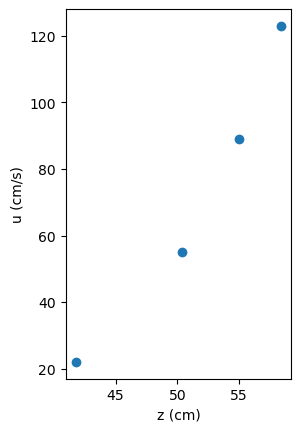

In [59]:
plt.figure()
plt.subplot(121)
plt.plot(df['u(cm/s)'], df['z(cm)'], 'o')
plt.xlabel('z (cm)')
plt.ylabel('u (cm/s)')

##### Exercise:

Create a function called `loglayer` which returns the modeled "law of the wall" velocity as a function of $z$, $u_*$ and $z_o$. 

In [14]:
def loglayer(z, ustar, zo):
    u = ustar/0.41 * np.log(z/zo)
    return u

##### Exercise:

Use the `curve_fit` function in the `scipy.optimize` module to determine the best-fit values fo $u_*$ and $z_o$ based on the data given. What type of sediment do you think this is?

In [45]:
p, pcov = curve_fit(loglayer, df['z(cm)'], df['u(cm/s)'])

/Users/tconnolly/opt/miniconda3/envs/ms263-24/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [51]:
pcov

array([[0.00315322, 0.0012207 ],
       [0.0012207 , 0.0004795 ]])

In [47]:
ustar = p[0]
zo = p[1]

In [48]:
ustar

3.9332503305003326

In [49]:
zo

0.2841904736735094

##### Exercise:

Plot the model with the data. Make sure the model looks like a smooth curve.

In [37]:
z = np.linspace(zo, 130, 1000)

Text(0, 0.5, 'u (cm/s)')

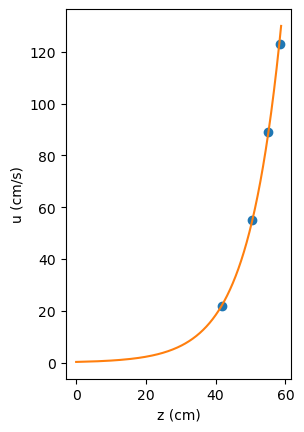

In [39]:
plt.figure()
plt.subplot(121)
plt.plot(df['u(cm/s)'], df['z(cm)'], 'o')
plt.plot(loglayer(z, ustar, zo), z, '-')
plt.xlabel('z (cm)')
plt.ylabel('u (cm/s)')

##### Exercise:

When Tom's Geo Oce professor made him do this by hand (by drawing a straight line through the data on logarithmic graph paper) he got $u_*$ = 3.98 cm/s and $z_o$ = 0.30 cm. Is this "hand" estimate within the uncertainty of your estimate (as defined by the standard errors of the coefficients)?

In [52]:
zo

0.2841904736735094

In [53]:
np.sqrt(pcov[1,1])

0.02189743361721941

In [57]:
print(ustar - np.sqrt(pcov[0,0]), ustar + np.sqrt(pcov[0,0]))

3.8770968158129175 3.9894038451877476


In [58]:
print(zo - np.sqrt(pcov[1,1]), zo + np.sqrt(pcov[1,1]))

0.26229304005629 0.3060879072907288
